# **Import** **the** **Dependencies**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Collection & Processing**

In [3]:
# Load the dataset
column_names = ['ID', 'ENTITY', 'SENTIMENT', 'COMMENTS']
data = pd.read_csv('/content/twitter_training.csv', header=0, names=column_names)


In [4]:
# Explore the data
data.head()

,ID,ENTITY,SENTIMENT,COMMENTS
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
# Explore the data
data.tail()

,ID,ENTITY,SENTIMENT,COMMENTS
46289,11944,Verizon,Neutral,The last 3 August’s I have broken my phone. Th...
46290,11944,Verizon,Neutral,The last 3 August's I've broken my phone. This...
46291,11944,Verizon,Neutral,The last time I broke my phone was on August 3...
46292,11944,Verizon,Neutral,The last 3 August’s I have broken my phone. Th...
46293,11944,Verizon,Neutral,7


In [6]:
data.shape

(46294, 4)

In [7]:
#Count of unique entities
ENTITY_count = data['ENTITY'].value_counts()
print(ENTITY_count)

Microsoft                            2400
LeagueOfLegends                      2394
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Dota2                                2364
WorldOfCraft                         2364
NBA2K                                2352
Battlefield                          2346
Overwatch                            2334
Xbox(Xseries)                        2334
Amazon                               2316
PlayStation5(PS5)                    2310
CS-GO                                2304
Google                               2298
Hearthstone                          2298
Borderlands                          2285
Fortnite                             2274
PlayerUnknownsBattlegrounds(PUBG)    2274
AssassinsCreed                       2244
Verizon                              2051
Name: ENTITY, dtype: int64


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46294 entries, 0 to 46293
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         46294 non-null  int64 
 1   ENTITY     46294 non-null  object
 2   SENTIMENT  46294 non-null  object
 3   COMMENTS   45849 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


# **Check** **Duplicates**

In [9]:
duplicates = data.duplicated()
duplicated_rows = data[duplicates]
duplicated_rows.count()

ID           1732
ENTITY       1732
SENTIMENT    1732
COMMENTS     1501
dtype: int64

In [10]:
#drop duplicates
data.drop_duplicates(inplace= True)

# **Check missing value**

In [11]:
data.isnull().sum()

ID             0
ENTITY         0
SENTIMENT      0
COMMENTS     214
dtype: int64

In [12]:
#drop missing value
data = data.dropna()

In [13]:
data.isnull().sum()

ID           0
ENTITY       0
SENTIMENT    0
COMMENTS     0
dtype: int64

In [14]:
#number of unique values
data.nunique()

ID            7716
ENTITY          20
SENTIMENT        4
COMMENTS     42997
dtype: int64

In [15]:
for i in range(5):
    print(f"{i+1}: {data['COMMENTS'][i]}  -> {data['SENTIMENT'][i]}")


1: I am coming to the borders and I will kill you all,  -> Positive
2: im getting on borderlands and i will kill you all,  -> Positive
3: im coming on borderlands and i will murder you all,  -> Positive
4: im getting on borderlands 2 and i will murder you me all,  -> Positive
5: im getting into borderlands and i can murder you all,  -> Positive


# **Sentiment analysis**

In [16]:
data['SENTIMENT'].value_counts()

Positive      12996
Negative      11795
Neutral       11084
Irrelevant     8473
Name: SENTIMENT, dtype: int64

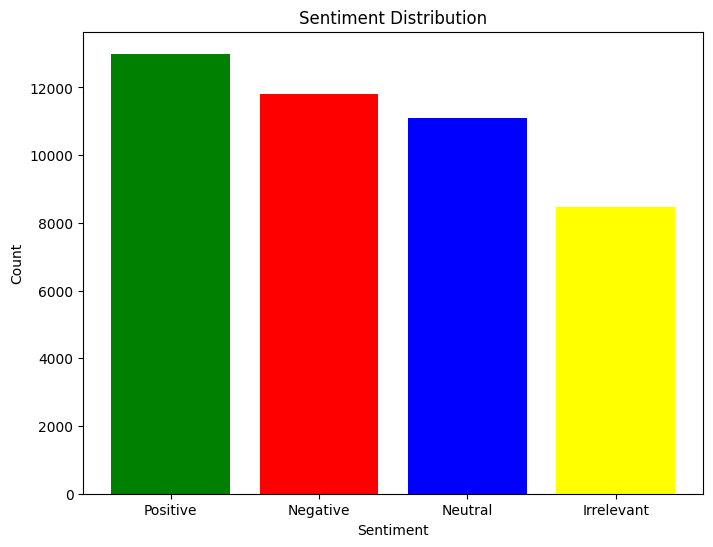

In [17]:
SENTIMENT_distribution = data['SENTIMENT'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(SENTIMENT_distribution.index, SENTIMENT_distribution.values, color=['green', 'red','blue','yellow'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

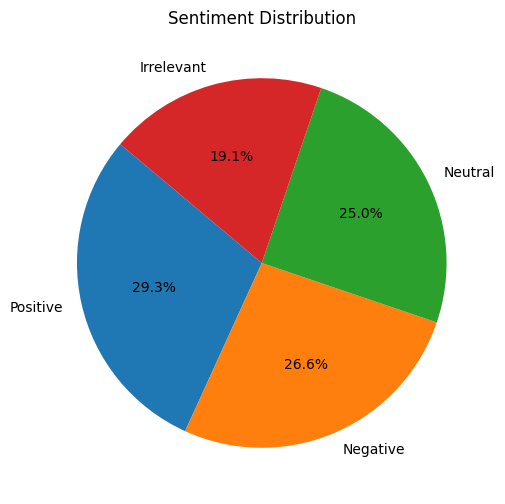

In [18]:
# Visualize sentiment distribution using piechart

SENTIMENT_distribution = data['SENTIMENT'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(SENTIMENT_distribution, labels=SENTIMENT_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

<ipython-input-19-d26a7ecaddc1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SENTIMENT', data=data, palette='Set2')


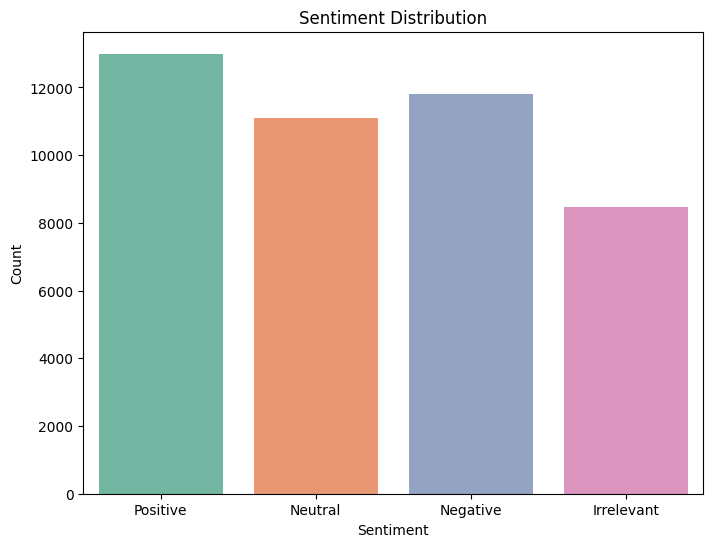

In [19]:
# Visualize sentiment distribution using countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='SENTIMENT', data=data, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<ipython-input-20-7e4c5976dfef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ENTITY', data=data, palette='Set2')


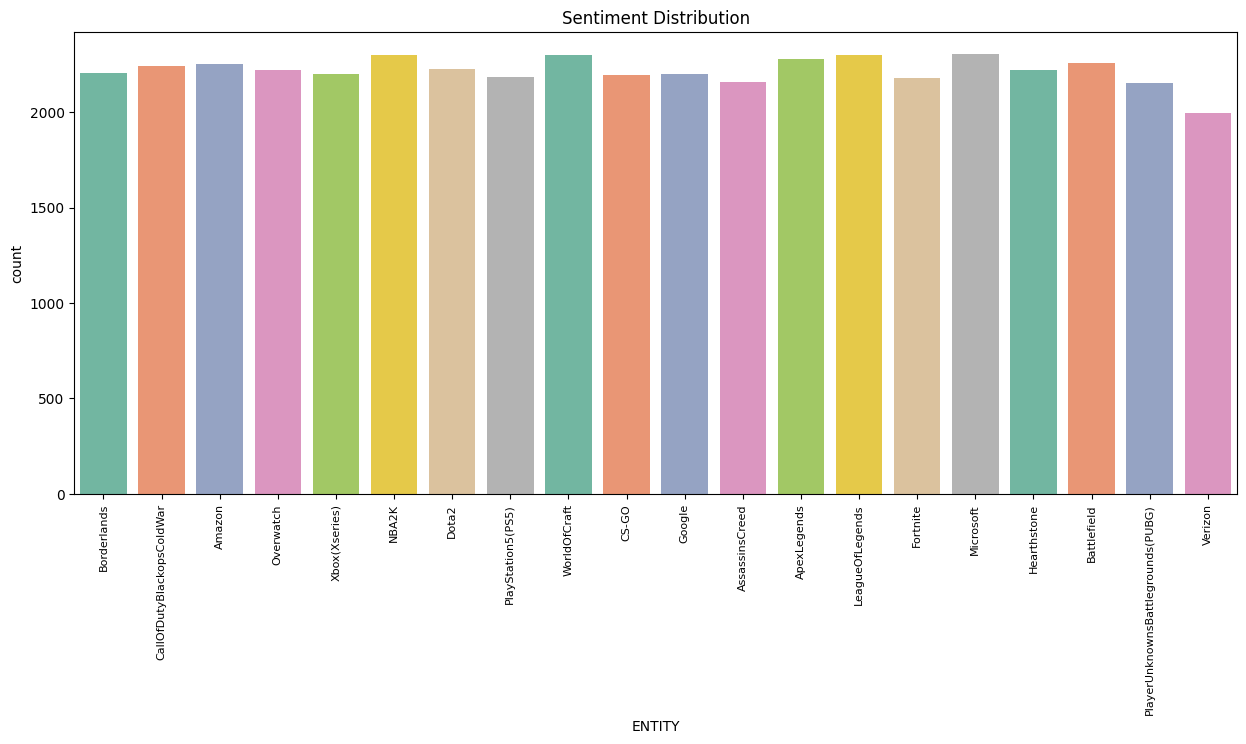

In [20]:
plt.figure(figsize=(15, 6))
sns.countplot(x='ENTITY', data=data, palette='Set2')
plt.title('Sentiment Distribution')
plt.xticks(rotation=90, fontsize=8)
plt.show()

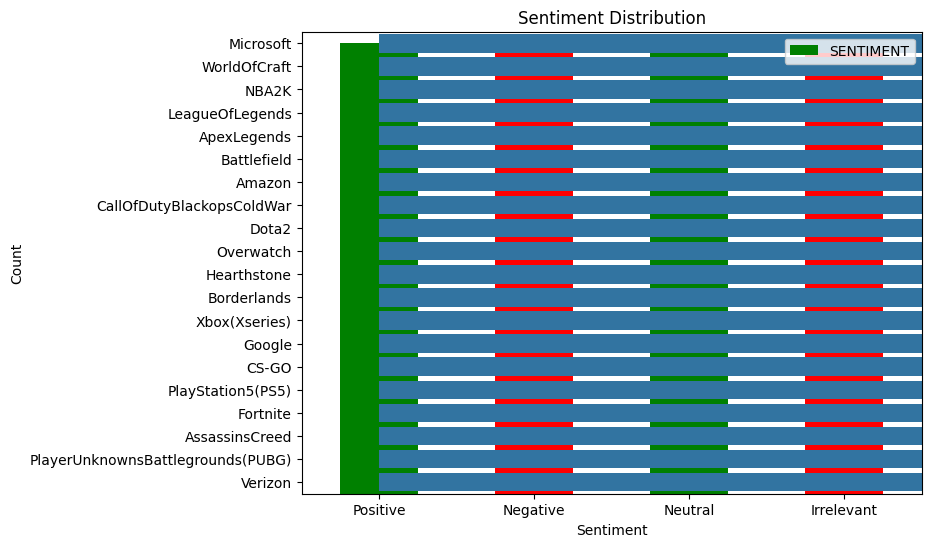

In [21]:
plt.figure(figsize=(8, 6))
SENTIMENT_distribution.plot(kind='bar', color=['green', 'red'])
sns.barplot(x=data['ENTITY'].value_counts(),y= data['ENTITY'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=0)
plt.show()

# **WordCloud**


In [22]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
# Data preprocessing
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+\.com\S+', '', text)  # Remove URLs
    text = re.sub(r'\@\w+','',text) # Remove usernames
    text = re.sub(r'\#','',text) # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert text to lowercase
    return text

In [25]:
data['COMMENTS'] = data['COMMENTS'].apply(preprocess_text)

In [26]:
data.head()

,ID,ENTITY,SENTIMENT,COMMENTS
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands and i will murder y...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [27]:
from sklearn.model_selection import train_test_split
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['ENTITY'], data['SENTIMENT'], test_size=0.2, random_state=42)

# **Feature extraction using TF-IDF**

In [46]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [37]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [38]:
# Predict on test set
y_pred = model.predict(X_test_tfidf)


In [39]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.41307779030439684
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.39      0.31      0.35      1711
    Negative       0.48      0.27      0.35      2338
     Neutral       0.41      0.50      0.45      2244
    Positive       0.40      0.54      0.46      2577

    accuracy                           0.41      8870
   macro avg       0.42      0.40      0.40      8870
weighted avg       0.42      0.41      0.40      8870



In [40]:
# Define plot_wordcloud function
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis("off")
    plt.show()


In [28]:
# Separate positive and negative tweets for visualization
positive_tweets = data[data['SENTIMENT'] == 'positive']['ENTITY'].values
negative_tweets = data[data['SENTIMENT'] == 'negative']['ENTITY'].values

In [29]:
# Convert arrays to single strings
positive_text = ' '.join(positive_tweets)
negative_text = ' '.join(negative_tweets)

In [42]:
# Generate word cloud for positive tweets
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate('Happy')
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate('Good')

# Generate word cloud for negative tweets
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate('Unlucky')
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate('Bad')

In [43]:
# Plot word clouds
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

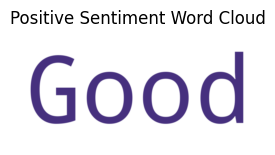

In [44]:
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis("off")

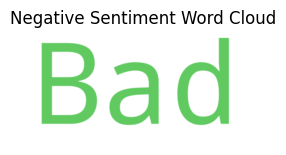

In [45]:
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis("off")
plt.show()